#  CO2 concentration by Donato Tiano

#### Loading Dataset

As first step, I've downloaded the file and I've put it in the GitLab. I've modified the file .csv removing the header.
Then, I've download the file via Python and printed every row of the dataset. Moreover, I've created a dataframe in order to organize better the information. 
The measure extracted from the .csv are converted in Float.

In [77]:
import csv
import requests
import pandas as pd
CSV_URL = 'https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    datasetDict = {'Smocker': [],
        'Status': [],
        'Age': []
        }
    for row in my_list[1:]:
        datasetDict['Smocker'].append(row[0])
        datasetDict['Status'].append(row[1])
        datasetDict['Age'].append(float(row[2]))
        

df = pd.DataFrame(datasetDict, columns = ['Smocker', 'Status','Age'])
print(df)

     Smocker Status   Age
0        Yes  Alive  21.0
1        Yes  Alive  19.3
2         No   Dead  57.5
3         No  Alive  47.1
4        Yes  Alive  81.4
5         No  Alive  36.8
6         No  Alive  23.8
7        Yes   Dead  57.5
8        Yes  Alive  24.8
9        Yes  Alive  49.5
10       Yes  Alive  30.0
11        No   Dead  66.0
12       Yes  Alive  49.2
13        No  Alive  58.4
14        No   Dead  60.6
15        No  Alive  25.1
16        No  Alive  43.5
17        No  Alive  27.1
18        No  Alive  58.3
19       Yes  Alive  65.7
20        No   Dead  73.2
21       Yes  Alive  38.3
22        No  Alive  33.4
23       Yes   Dead  62.3
24        No  Alive  18.0
25        No  Alive  56.2
26       Yes  Alive  59.2
27        No  Alive  25.8
28        No   Dead  36.9
29        No  Alive  20.2
...      ...    ...   ...
1284     Yes   Dead  36.0
1285     Yes  Alive  48.3
1286      No  Alive  63.1
1287      No  Alive  60.8
1288     Yes   Dead  39.3
1289      No  Alive  36.7
1290      No

### Computation of Mortality of Smocker and Not Smocker Women

I'm going to tabulate the total number of women alive and dead over the period according to their smoking habits.

In [63]:
smockerWomen = df[df.Smocker == 'Yes']
noSmockerWomen = df[df.Smocker == 'No']

First of all, I will count the number of women for each groups.

In [79]:
print("Number of Smocker Women: " + str(len(list(smockerWomen.Status))))
print("Number of No Smocker Women: " + str(len(list(noSmockerWomen.Status))))

Number of Smocker Women: 582
Number of No Smocker Women: 732


I'm going to compute the mortality rate of each table. The computation is very easy, I just count the number of women "*Dead*" for each group, subdivided by the number of women of the same group. 

In [101]:
from statistics import mean

print("Mortality rate of Smocker Women: " + str((list(smockerWomen.Status).count("Dead"))/len(list(smockerWomen.Status))))
print("Mortality rate of No Smocker Women: " + str((list(noSmockerWomen.Status).count("Dead"))/len(list(noSmockerWomen.Status))))


Mortality rate of Smocker Women: 0.23883161512027493
Mortality rate of No Smocker Women: 0.31420765027322406


The Mortality rate of the Smocker Women is lower than the No Smocker Women, but it contains less number of people.

### Mortality Rate by Age Group

I'm going to compute the mortality rate grouped by the age of the women. First of all, I'm going to subdivide the Smocker and NoSmocker Group by the age.

In [90]:
smockerWomen1834 = smockerWomen[smockerWomen.Age < 34]
smockerWomen3454 = smockerWomen[(smockerWomen.Age > 34) & (smockerWomen.Age < 54)]
smockerWomen5564 = smockerWomen[(smockerWomen.Age > 55) & (smockerWomen.Age < 64)]
smockerWomen65 = smockerWomen[smockerWomen.Age > 65]

noSmockerWomen1834 = noSmockerWomen[noSmockerWomen.Age < 34]
noSmockerWomen3454 = noSmockerWomen[(noSmockerWomen.Age > 34) & (noSmockerWomen.Age < 54)]
noSmockerWomen5564 = noSmockerWomen[(noSmockerWomen.Age > 55) & (noSmockerWomen.Age < 64)]
noSmockerWomen65 = noSmockerWomen[noSmockerWomen.Age > 65]

Then, it is possible to show the mortality rate for each group of age and smocker/noSmocker

In [98]:
smockerWomen1834Mort = (list(smockerWomen1834.Status).count("Dead"))/len(list(smockerWomen1834.Status))
smockerWomen3454Mort = (list(smockerWomen3454.Status).count("Dead"))/len(list(smockerWomen3454.Status))
smockerWomen5564Mort = (list(smockerWomen5564.Status).count("Dead"))/len(list(smockerWomen5564.Status))
smockerWomen65Mort = (list(smockerWomen65.Status).count("Dead"))/len(list(smockerWomen65.Status))

noSmockerWomen1834Mort = (list(noSmockerWomen1834.Status).count("Dead"))/len(list(noSmockerWomen1834.Status))
noSmockerWomen3454Mort = (list(noSmockerWomen3454.Status).count("Dead"))/len(list(noSmockerWomen3454.Status))
noSmockerWomen5564Mort = (list(noSmockerWomen5564.Status).count("Dead"))/len(list(noSmockerWomen5564.Status))
noSmockerWomen65Mort = (list(noSmockerWomen65.Status).count("Dead"))/len(list(noSmockerWomen65.Status))

print("Mortality rate of Smocker Women 18-34: " + str(smockerWomen1834Mort))
print("Mortality rate of Smocker Women 35-54: " + str(smockerWomen3454Mort))
print("Mortality rate of Smocker Women 55-64: " + str(smockerWomen5564Mort))
print("Mortality rate of Smocker Women 65: " + str(smockerWomen65Mort))
print()
print("Mortality rate of No Smocker Women 18-34: " + str(noSmockerWomen1834Mort))
print("Mortality rate of No Smocker Women 35-54: " + str(noSmockerWomen3454Mort))
print("Mortality rate of No Smocker Women 55-64: " + str(noSmockerWomen5564Mort))
print("Mortality rate of No Smocker Women 65: " + str(noSmockerWomen65Mort))

Mortality rate of Smocker Women 18-34: 0.027932960893854747
Mortality rate of Smocker Women 15-54: 0.1729957805907173
Mortality rate of Smocker Women 55-64: 0.43859649122807015
Mortality rate of Smocker Women 65: 0.8571428571428571

Mortality rate of No Smocker Women 18-34: 0.0273972602739726
Mortality rate of No Smocker Women 15-54: 0.09547738693467336
Mortality rate of No Smocker Women 55-64: 0.3277310924369748
Mortality rate of No Smocker Women 65: 0.859375


In the graph below is shown the difference in terms of rate mortality of each range group. It is notable the high difference of mortality rate on the middle group 35-64. Indeed, in the Smocker group the mortality rate is higher. 

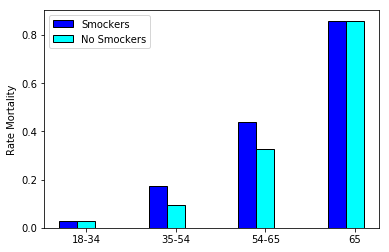

In [100]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.2

# Bars of Smocker Women
bars1 = [smockerWomen1834Mort,smockerWomen3454Mort, smockerWomen5564Mort, smockerWomen65Mort]


# Bars of No Smocker Women
bars2 =[ noSmockerWomen1834Mort, noSmockerWomen3454Mort, noSmockerWomen5564Mort,noSmockerWomen65Mort]

 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Smockers')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black',  capsize=7, label='No Smockers')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['18-34', '35-54', '54-65','65'])
plt.ylabel('Rate Mortality')
plt.legend()
 
# Show graphic
plt.show()

### Computation of Logistic Regression

I've computed the linear regression, but the results appear similar.

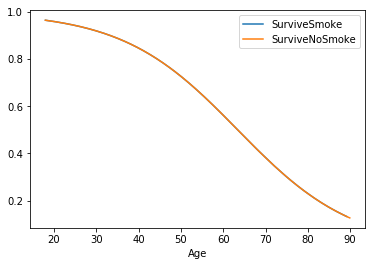

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# print(smockerWomen5564)
labelencoder = LabelEncoder()
smockerWomen['Death'] = labelencoder.fit_transform(smockerWomen['Status'])
noSmockerWomen['Death'] = labelencoder.fit_transform(noSmockerWomen['Status'])


listApp = []

listAppNoSmo = []

for x in list(smockerWomen['Age']):
    listApp.append([x])

for x in list(noSmockerWomen['Age']):
    listAppNoSmo.append([x])

    

model = LogisticRegression(solver='liblinear', random_state=0).fit(listApp,list(smockerWomen['Death']))
modelNoSm = LogisticRegression(solver='liblinear', random_state=0).fit(listAppNoSmo,list(noSmockerWomen['Death']))

resSmok = model.predict_proba(listApp)
resNoSmok = model.predict_proba(listAppNoSmo)

# print(resSmok[0][0])
dictSmokeRate = {'Age':[],'SurviveSmoke':[]}
for x in range(0,len(listApp)):
    dictSmokeRate['Age'].append(listApp[x][0])
    dictSmokeRate['SurviveSmoke'].append(resSmok[x][0])

    

dictNoSmokeRate = {'Age':[],'SurviveNoSmoke':[]}
for x in range(0,len(listAppNoSmo)):
    dictNoSmokeRate['Age'].append(listAppNoSmo[x][0])
    dictNoSmokeRate['SurviveNoSmoke'].append(resNoSmok[x][0])
    
dfSmoke = pd.DataFrame(dictSmokeRate, columns = ['Age','SurviveSmoke'])
dfSmoke = dfSmoke.sort_values(by=['Age'])

# print(dictNoSmokeRate)

dfNoSmoke = pd.DataFrame(dictNoSmokeRate, columns = ['Age','SurviveNoSmoke'])
dfNoSmoke = dfNoSmoke.sort_values(by=['Age'])

ax = dfSmoke.plot(x='Age')
dfNoSmoke.plot(x='Age',ax=ax)
